<a href="https://colab.research.google.com/github/scarioscia/modeling_biological_populations/blob/main/Day_6_SEIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Last day of class! 
We made it! At the end of class we'll go over our learning goals and answer any remaining questions you have, whether about these models, your future coursework or research, or anything! 

But in the meantime, let's look at one more model... 

## The SEIR Model for disease 

The SEIR model allows you to investigate how a given population progresses through a disease.

The model breaks a population into four separate and non-overlapping sub-populations: 
- Susceptible (S): individuals who are susceptible to the disease
- Exposed (E): individuals who were exposed to the disease and will develop it
- Infected (I): individuals currently infected with the disease 
- Recovered (R): individuals who can be removed from the system (either because they now have immunity, or because they died) 


At each time step, there is some probability that a given individual will move from one sub-population to another. 


Much like the earlier two-population models, the change in each group depends on the number of individuals in the other groups, as well as the rate of change (e.g., in past models this may have been the likelihood of a predator eating a prey in a given generation, or the amount of growth a predator got by eating a prey). 

But there is one major difference in how these populations are calculated and compared. Any guesses? 

In [ ]:
# Your guess here for what makes this model different (there are a bunch of possible correct answers!)

## Rules for the SEIR Model 

With each timepoint, there is a change between populations: the change in Susceptible over time; the change in Exposed over time; etc. We can make an equation for each of those changes, based on parameters and factors, so for each change (delta) in subpopulation, we come up with an equation: 


\begin{align}
\frac{\mathrm{d}S}{\mathrm{d}t} &= - β * S \\[1em]
\frac{\mathrm{d}E}{\mathrm{d}t} &= β * S - σ * E \\[1em]
\frac{\mathrm{d}I}{\mathrm{d}t} &= σ * E - γ * I \\[1em]
\frac{\mathrm{d}R}{\mathrm{d}t} &= γ * I \\[1em]
\end{align}


Can anyone think about what parameters might be relevant for each of these equations? 

We can start with the change in susceptible over time. What affects how many individuals in the population are in the susceptible subpopulation? 

In [2]:
# get a function that returns dSdt, dEdt, dIdt, dRdt for each timepoint 
def SEIR(S, E, I, R, beta, gamma, sigma):

  dSdt = -beta * S
  dEdt = beta * S - sigma * E
  dIdt = sigma * E - gamma * I 
  dRdt = gamma * I

  return(dSdt, dEdt, dIdt, dRdt)

Now I want to introduce the idea of integrating under our deltas, using a function called `odeint`, which we'll import from `scipy.integrate`. 

(While we're importing, let's also grab our usuals - `matplotlib.pyplot` so we can plot our outputs, and `numpy`, which today we'll use to create the time dimension that we are integrating over - much like we did for Wright-Fisher).

In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

Take a minute to read the `odeint` manual and figure out how it might engage with the `SEIR` function you wrote above. You might have to modify your SEIR function (which is totally fine) but the way `odeint` and `SEIR` interact should be somewhat clear from the manual... 

In [ ]:
# using odeint to take the integral under a period of time 
# manual: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html


In [ ]:
#@title <font color='green '>Run this cell for an explanation of the odeint() function 

# The inputs to odeint are: 
# the function you want to call 
# the initial (starting) conditions at which you're calling it
# the time points over which you're calling it 
# any additional arguments necessary for your function 

# Here is an example of odeint's syntax (this won't work because you haven't defined SEIR to account for odeint yet) 
odeint(SEIR, initial_popsizes, t, args=(beta, gamma, sigma))

Now, usually when you define a function, you give it a set of arguments. If you look back past your previous code notebooks, you'll see that in every case, every argument defined in your function is used IN THAT function. 

If you scroll down to the example code at the bottom of the `odeint` manual, you'll see that in their function `pend`, they define `t` as an argument... but then they don't use `t` at all within the `pend` function. That's because `t` (here, the duration of time over which odeint is integrating) is a required parameter for `odeint`. So, it needs to be passed as an argument to the function that `odeint` is working on.

The other thing we need to change is the initial sizes of each population - number of susceptible, number of exposed, etc. In `odeint`, those initial conditions need to be passed as one variable; they can then be assigned to each individual population (S, E, I, and R) within your `SEIR` function. 

In the cell below, define a list `initial_popsizes` that contains the values that you can then assign to each of the populations. Think also about what you want those values to be... how many people realistically would be recovered at the start of your simulation? How many would be infected? 

In [ ]:
# define your initial conditions here
initial_popsizes = 

In [4]:
#@title <font color='green '>Run this cell for an example of how to define `initial_popsizes`
#initial_popsizes = S0, E0, I0, R0
initial_popsizes = 1000, 0, 1, 0


The next thing you'll notice that `odeint` requires is a timescale, `t`, over which to iterate. We'll use a built-in function from the `numpy` package, called `linspace` to create this grid of timepoints. 

I've put in 160 days here, but you can change that number depending on how long you'd like to run your function. You can also update this later to replace 160 with a variable that you select randomly or from some distribution. 

In [5]:
# define times over which odeint will integrate 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

Given those updates, edit the `SEIR` function from above to: 
- accept `initial_popsizes` as an argument 
- assign each value in `initial_popsizes` to the starting populations (S, E, I, and R) 
- accept `t` as an argument (remember that this `t` doesn't have to be used within `SEIR`, so it's okay that the only time it's mentioned is as an argument) 

In [ ]:
# Your updated SEIR function here 

In [6]:
#@title <font color='green '>Run this cell for a function that can be called by odeint to compute the change in each stage of SEIR 

# get a function that returns dSdt, dEdt, dIdt, dRdt for each timepoint 
def SEIR(initial_popsizes, t, beta, gamma, sigma):
  
  S, E, I, R = initial_popsizes

  dSdt = -beta * S
  dEdt = beta * S - sigma * E
  dIdt = sigma * E - gamma * I 
  dRdt = gamma * I

  # modify it so that people in R have a different sigma (exposure rate) 

  return(dSdt, dEdt, dIdt, dRdt)

To call `odeint` on your function, follow similar syntax as in the manual. Remember from the manual that the arguments are: 
- the function you want `odeint` to iterate over 
- the starting conditions in your model 
- the time you want `odeint` to iterate over
- any additional arguments required for your function 


In [ ]:
# call odeint on your function here 

In [9]:
#@title <font color='green '>Run this cell for an example of the syntax to call odeint 

odeint(SEIR, initial_popsizes, t, args=(0.2, 0.1, 0.2))

In the cell above, we define `beta`, `gamma`, and `sigma` directly in the `odeint` execution. But you can also define them as variables ahead of time (and this is better practice, because it more clearly lets you change the parameters as you explore your function), and then call `odeint` as below:

In [10]:
beta = 0.2
gamma = 0.15
sigma = 0.1

pop_sizes = odeint(SEIR, initial_popsizes, t, args=(beta, gamma, sigma))

Now your output (the number of individuals in S, E, I, and R, after each timepoint) is all saved in `pop_sizes`. You can investigate the dimensions of `pop_sizes` in the cell below. 

In [ ]:
# print pop_sizes and its dimensions here 

The SEIR model is particularly interested when plotted; this way you can see the relative change in each population over time. We're going to maniuplate that output, `pop_sizes`, just slightly; this will allow us to plot the results using the same `matplotlib.pyplot` syntax we've used throughout the course. 

We are going to use the `.T` function from `numpy` to *transpose* the output of `pop_sizes` and create four distinct lists, one for each population: 

In [11]:
# Manual for the .T function https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html
S, E, I, R = pop_sizes.T

In [ ]:
# Investigate each of these outputs here 

Now, using the syntax we've used throughout class, plot the four populations over time. Label each line and create a legend that shows which color represents each population. 

In [ ]:
# Your plot here 

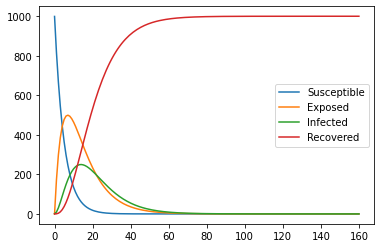

In [12]:
#@title <font color='green '>Run this cell for code to plot your four populations 

fig, ax = plt.subplots()
ax.plot(t, S, label = "Susceptible")
ax.plot(t, E, label = "Exposed")
ax.plot(t, I, label = "Infected")
ax.plot(t, R, label = "Recovered")
leg = plt.legend(loc="best")

# Modifying the SEIR model 

So far, your `SEIR` function and `odeint` compute the change in each of S, E,I, and R over time. Here are a few modifications (in no particular order) you might consider implementing, to add different complexities to your model: 

1. Allow individuals to return to Susceptible after being Recovered 
2. Create separate, distinct groups for Recovered and Deceased individuals 
3. Allow for some individuals who are Exposed to *not* catch the disease
4. Set the initial size of the populations as variables with respect to one another (rather than individually defining each) 
5. Draw your rates (beta, gamma, sigma) from a distribution (maybe even execute your function on a *list* of rates and plot those executions on the same graph, to allow comparison of the outcomes 